In [5]:
import os
import matplotlib.pyplot as plt
import random
import shutil

## STAGE 1

In [6]:
base_dir="D:\\VIT\\Capstone\\Dataset\\img-pro-dataset\\final_dataset"

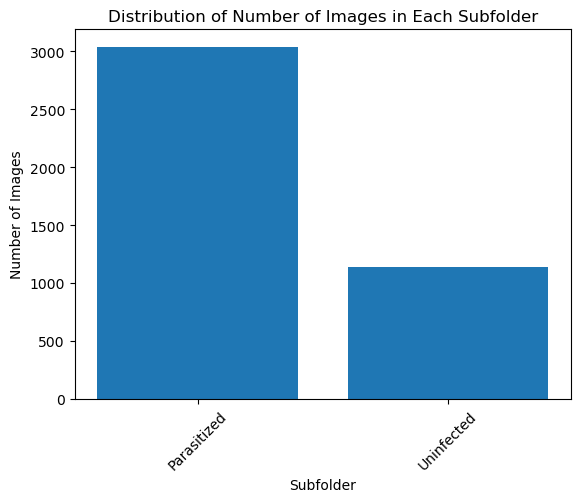

In [7]:
# Initialize dictionaries to store the count of images in each subfolder
image_counts = {}

# Iterate over the subfolders
for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Count the number of images in the subfolder
        num_images = len(os.listdir(subfolder_path))
        image_counts[subfolder] = num_images

# Plot the histogram
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel('Subfolder')
plt.ylabel('Number of Images')
plt.title('Distribution of Number of Images in Each Subfolder')
plt.xticks(rotation=45)
plt.show()


In [14]:
output_dir = 'D:\\VIT\\Capstone\\Dataset\\img-pro-dataset\\final_dataset\\balanced'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define classes
classes = ['Parasitized', 'Uninfected']

# Count the number of images in the Falciparum class
min_num_images = 1141
# Initialize a list to store resampled image paths
resampled_image_paths = []

# Loop through each class
for class_name in classes:
    # Get the list of image paths in the class
    class_images = os.listdir(os.path.join(base_dir, class_name))
    # Randomly select min_num_images images from the class
    selected_images = random.sample(class_images, min_num_images)
    # Add the selected images to the resampled image paths
    resampled_image_paths.extend([(class_name, image_name) for image_name in selected_images])

# Copy the resampled images to the output directory
for class_name, image_name in resampled_image_paths:
    src_path = os.path.join(base_dir, class_name, image_name)
    dst_path = os.path.join(output_dir, class_name, image_name)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    shutil.copy(src_path, dst_path)

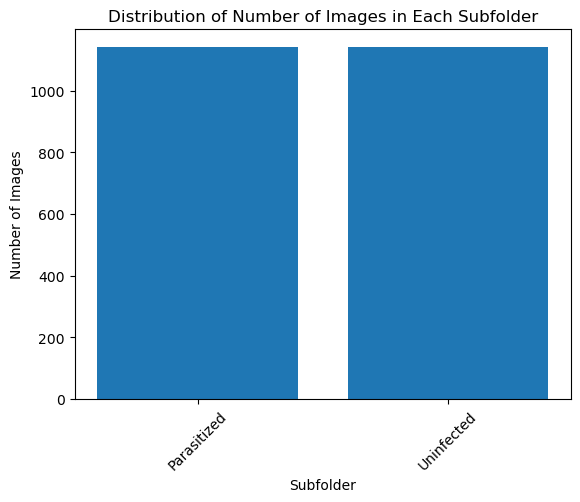

In [15]:
# Initialize dictionaries to store the count of images in each subfolder
image_counts = {}

# Iterate over the subfolders
for subfolder in os.listdir(output_dir):
    subfolder_path = os.path.join(output_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Count the number of images in the subfolder
        num_images = len(os.listdir(subfolder_path))
        image_counts[subfolder] = num_images

# Plot the histogram
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel('Subfolder')
plt.ylabel('Number of Images')
plt.title('Distribution of Number of Images in Each Subfolder')
plt.xticks(rotation=45)
plt.show()


In [16]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, Lambda, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from glob import glob
import cv2
import os

In [22]:
IMG_SIZE = 64
category = ['Uninfected', 'Parasitized']
def preprocess_image(image_path):

    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR)

    denoised_image = cv2.GaussianBlur(img_array, (5, 5), 0)

    #equalized_image = cv2.equalizeHist(gray_image)

    sharpening_filter = np.array([[-1, -1, -1],
                                  [-1, 9, -1],
                                  [-1, -1, -1]])
    filtered_image = cv2.filter2D(denoised_image, -1, sharpening_filter)

    new_array = cv2.resize(filtered_image, (IMG_SIZE, IMG_SIZE))

    return new_array

def get_train_data_with_preprocess(direct):
    data = []
    for labels in category:
        path = os.path.join(direct, labels)
        class_num = category.index(labels)
        for img in os.listdir(path):
            try:
                processed_image = preprocess_image(os.path.join(path, img))
                data.append([processed_image, class_num])
            except Exception as e:
                print(e)
    return data

def get_train_data_without_preprocess(direct):
    data = []
    for labels in category:
        path = os.path.join(direct, labels)
        class_num = category.index(labels)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [27]:
IMG_SIZE = 256
category = ['Uninfected', 'Parasitized']
def preprocess_image(image_path):

    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR)

    denoised_image = cv2.GaussianBlur(img_array, (5, 5), 0)

    gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)

    sharpening_filter = np.array([[-1, -1, -1],
                                  [-1, 9, -1],
                                  [-1, -1, -1]])
    filtered_image = cv2.filter2D(equalized_image, -1, sharpening_filter)

    new_array = cv2.resize(filtered_image, (IMG_SIZE, IMG_SIZE))

    return new_array

def get_train_data_with_preprocess(direct):
    data = []
    for labels in category:
        path = os.path.join(direct, labels)
        class_num = category.index(labels)
        for img in os.listdir(path):
            try:
                processed_image = preprocess_image(os.path.join(path, img))
                data.append([processed_image, class_num])
            except Exception as e:
                print(e)
    return data

def get_train_data_without_preprocess(direct):
    data = []
    for labels in category:
        path = os.path.join(direct, labels)
        class_num = category.index(labels)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [28]:
new_data = get_train_data_without_preprocess('D:\\VIT\\Capstone\\Dataset\\img-pro-dataset\\final_dataset\\balanced')

C:\Users\Acer\AppData\Local\Temp\ipykernel_22716\165556950.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [29]:
preprocess_data = get_train_data_with_preprocess('D:\\VIT\\Capstone\\Dataset\\img-pro-dataset\\final_dataset\\balanced')

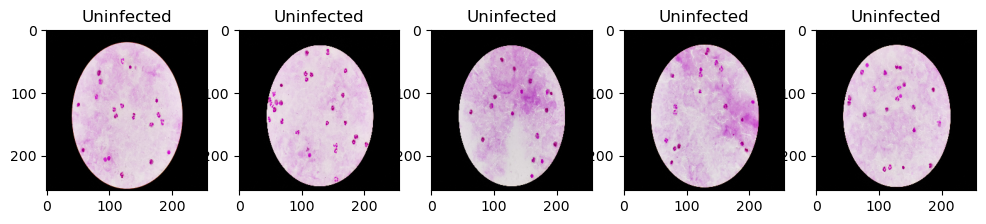

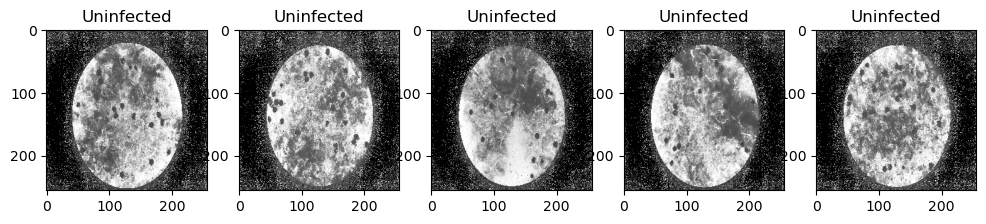

In [30]:
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(new_data[i][0], cmap='gray')
    plt.title(category[new_data[i][1]])
plt.show()
plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(preprocess_data[i][0], cmap='gray')
    plt.title(category[preprocess_data[i][1]])
plt.show()


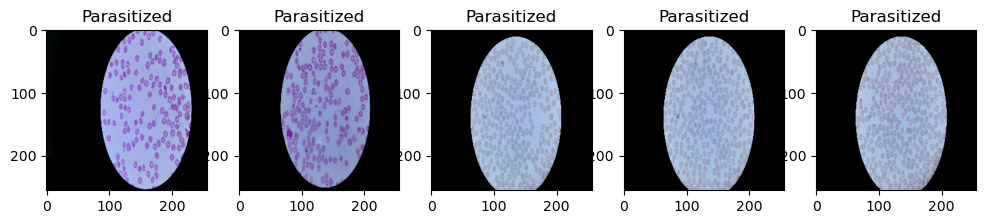

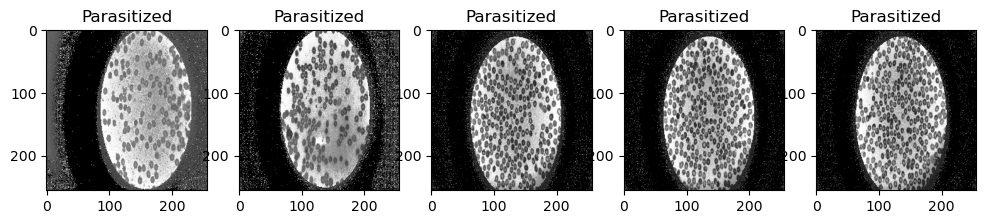

In [31]:
infected_data_normal = [item for item in new_data if item[1] == category.index('Parasitized')]
infected_data_pre = [item for item in preprocess_data if item[1] == category.index('Parasitized')]
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(infected_data_normal[i][0], cmap='gray')
    plt.title(category[infected_data_normal[i][1]])
plt.show()
plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(infected_data_pre[i][0], cmap='gray')
    plt.title(category[infected_data_pre[i][1]])
plt.show()

In [32]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes = 2)

X = np.array(X)
y = np.array(y)

X = X.reshape(-1, 256, 256, 3)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

## CNN


In [39]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)      

In [40]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [41]:
r = model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator)
)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22716\1787456783.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
25/25 [==============================] - 29s 1s/step - loss: 0.9847 - accuracy: 0.6900 - val_loss: 0.2084 - val_accuracy: 0.9226
Epoch 2/10
25/25 [==============================] - 28s 1s/step - loss: 0.2125 - accuracy: 0.9155 - val_loss: 0.1524 - val_accuracy: 0.9299
Epoch 3/10
25/25 [==============================] - 29s 1s/step - loss: 0.1561 - accuracy: 0.9455 - val_loss: 0.1665 - val_accuracy: 0.9401
Epoch 4/10
25/25 [==============================] - 29s 1s/step - loss: 0.1272 - accuracy: 0.9493 - val_loss: 0.0952 - val_accuracy: 0.9547
Epoch 5/10
25/25 [==============================] - 29s 1s/step - loss: 0.1087 - accuracy: 0.9618 - val_loss: 0.1728 - val_accuracy: 0.9285
Epoch 6/10
25/25 [==============================] - 29s 1s/step - loss: 0.1044 - accuracy: 0.9599 - val_loss: 0.1573 - val_accuracy: 0.9328
Epoch 7/10
25/25 [==============================] - 29s 1s/step - loss: 0.0947 - accuracy: 0.9693 - val_loss: 0.1081 - val_accuracy: 0.9606
Epoch 8/10
25/25 [==

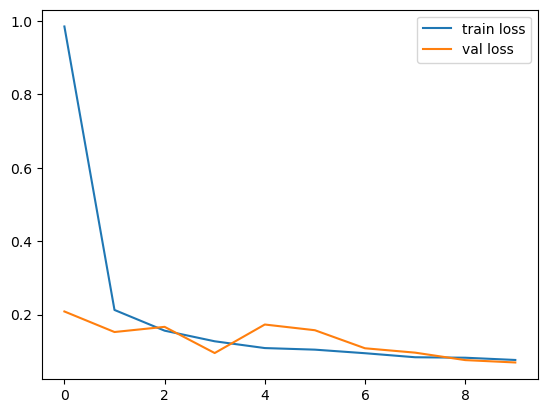

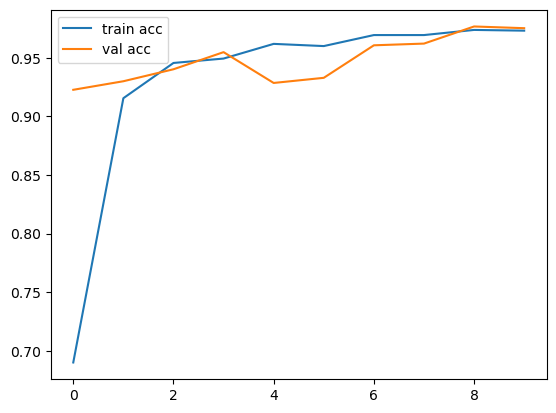

<Figure size 640x480 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
model.save("CNN_model.h5")

In [44]:
y_pred = model.predict(test_generator)

11/11 [==============================] - 2s 143ms/step


In [45]:
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test,axis=1)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[355,   1],
       [ 16, 313]], dtype=int64)

## VGG-19

In [48]:
vg19 = VGG19(input_shape=[IMG_SIZE, IMG_SIZE] + [3], weights="imagenet", include_top=False)

for layer in vg19.layers:
    layer.trainable = False

x = Flatten()(vg19.output)
prediction = Dense(len(category), activation="softmax")(x)
model = Model(inputs=vg19.input, outputs=prediction)


model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [49]:
history = model.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 10,
                                   shuffle = False,
                                   validation_data=test_generator, validation_steps=len(test_generator))

C:\Users\Acer\AppData\Local\Temp\ipykernel_22716\2204747151.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
24/24 [==============================] - 311s 12s/step - loss: 0.6528 - accuracy: 0.7959 - val_loss: 0.1649 - val_accuracy: 0.9343
Epoch 2/10
24/24 [==============================] - 313s 13s/step - loss: 0.1023 - accuracy: 0.9656 - val_loss: 0.0267 - val_accuracy: 0.9956
Epoch 3/10
24/24 [==============================] - 320s 13s/step - loss: 0.0700 - accuracy: 0.9768 - val_loss: 0.0631 - val_accuracy: 0.9796
Epoch 4/10
24/24 [==============================] - 323s 13s/step - loss: 0.0697 - accuracy: 0.9724 - val_loss: 0.0581 - val_accuracy: 0.9796
Epoch 5/10
24/24 [==============================] - 335s 14s/step - loss: 0.0564 - accuracy: 0.9800 - val_loss: 0.0854 - val_accuracy: 0.9635
Epoch 6/10
24/24 [==============================] - 324s 13s/step - loss: 0.0693 - accuracy: 0.9737 - val_loss: 0.1279 - val_accuracy: 0.9489
Epoch 7/10
24/24 [==============================] - 341s 14s/step - loss: 0.0613 - accuracy: 0.9800 - val_loss: 0.0660 - val_accuracy: 0.9766
Epoch 

In [50]:
model.evaluate_generator(test_generator)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22716\2205837447.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.07340095937252045, 0.970802903175354]

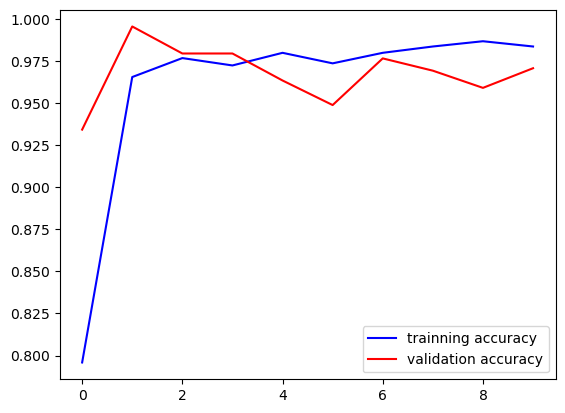

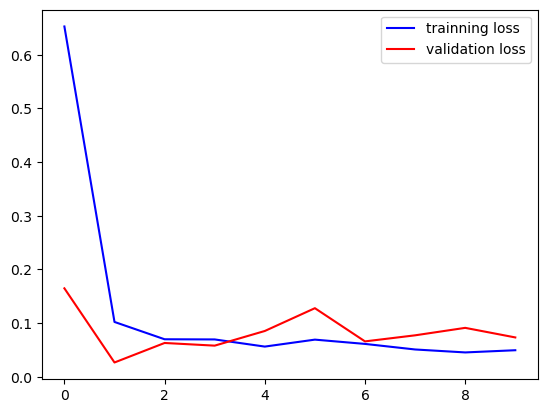

In [51]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [52]:
y_pred = model.predict(test_generator)
y_pred

11/11 [==============================] - 99s 9s/step


array([[1.7470272e-03, 9.9825293e-01],
       [2.2527647e-05, 9.9997741e-01],
       [9.9997979e-01, 2.0156125e-05],
       ...,
       [8.8044727e-04, 9.9911958e-01],
       [8.7644970e-01, 1.2355031e-01],
       [9.8927629e-01, 1.0723714e-02]], dtype=float32)

In [53]:
y_pred = np.argmax(y_pred, axis=1)
y_pred
y_true = np.argmax(y_test,axis=1)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[356,   0],
       [ 20, 309]], dtype=int64)

In [55]:
model.save("vgg_model.h5")